## Flowers Classification using Transfer Learning

In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
input_folder = "../Flowers_Classification/flowers"

In [4]:
import splitfolders
splitfolders.ratio(input_folder, output = "../Flowers_Classification/Dataset",seed=123,ratio=(0.8,0.1,0.1))

Copying files: 4317 files [00:31, 137.20 files/s]


In [5]:
training_dir = "../Flowers_Classification/Dataset/train"
validation_dir = "../Flowers_Classification/Dataset/val"
testing_dir = "../Flowers_Classification/Dataset/test"

In [6]:
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [7]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

In [8]:
count_files(os.path.join(training_dir))

There are 611 files in daisy
There are 841 files in dandelion
There are 627 files in rose
There are 586 files in sunflower
There are 787 files in tulip


In [9]:
count_files(os.path.join(validation_dir))

There are 76 files in daisy
There are 105 files in dandelion
There are 78 files in rose
There are 73 files in sunflower
There are 98 files in tulip


In [10]:
count_files(os.path.join(testing_dir))

There are 77 files in daisy
There are 106 files in dandelion
There are 79 files in rose
There are 74 files in sunflower
There are 99 files in tulip


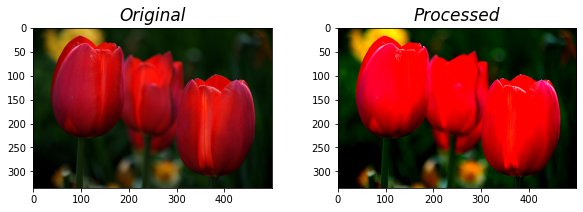

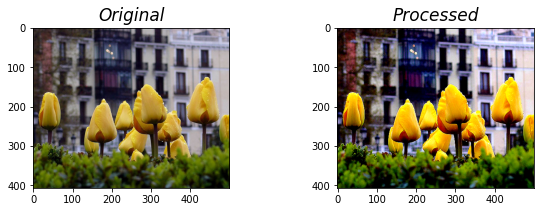

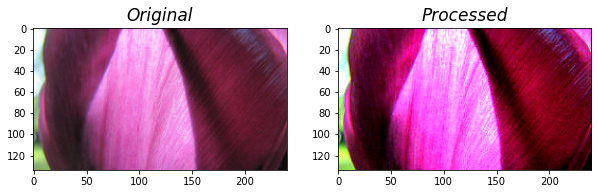

In [11]:
image_folder="tulip"  # The disease you want to display
number_of_images=3     # Number of images to display

def Preprocess():
    j=1
    for i in range(number_of_images):
    
        folder = os.path.join(testing_dir,image_folder)
        a=random.choice(os.listdir(folder))

        image=Image.open(os.path.join(folder,a))
        image_duplicate=image.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Original', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        ## Here we are enhancing the images quality
        image1=ImageEnhance.Color(image_duplicate).enhance(1.35)
        image1=ImageEnhance.Contrast(image1).enhance(1.45)
        image1=ImageEnhance.Sharpness(image1).enhance(2.5)
        
        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1
        
Preprocess()

In [12]:
IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) ## include_top = False means we are not including the last layer of the model

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(5, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

val_datagen = image.ImageDataGenerator(rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    training_dir,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    testing_dir,
    target_size = (224, 224),
    batch_size = 64, 
    class_mode = 'categorical')

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [14]:
class_map = training_set.class_indices
class_map

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [15]:
with tf.device("/device:GPU:0"):
    r = model.fit_generator(
        training_set,
        validation_data=val_set,
        epochs=10,
        steps_per_epoch=len(training_set),
        validation_steps=len(val_set)
)

Epoch 1/10
54/54 [==============================] - 83s 1s/step - loss: 0.8253 - accuracy: 0.6805 - val_loss: 0.5360 - val_accuracy: 0.8140
Epoch 2/10
54/54 [==============================] - 55s 1s/step - loss: 0.4756 - accuracy: 0.8259 - val_loss: 0.4751 - val_accuracy: 0.8256
Epoch 3/10
54/54 [==============================] - 58s 1s/step - loss: 0.4190 - accuracy: 0.8450 - val_loss: 0.4568 - val_accuracy: 0.8372
Epoch 4/10
54/54 [==============================] - 49s 901ms/step - loss: 0.3790 - accuracy: 0.8644 - val_loss: 0.4555 - val_accuracy: 0.8581
Epoch 5/10
54/54 [==============================] - 49s 896ms/step - loss: 0.3456 - accuracy: 0.8772 - val_loss: 0.4350 - val_accuracy: 0.8651
Epoch 6/10
54/54 [==============================] - 59s 1s/step - loss: 0.3066 - accuracy: 0.8862 - val_loss: 0.4600 - val_accuracy: 0.8581
Epoch 7/10
54/54 [==============================] - 51s 935ms/step - loss: 0.3068 - accuracy: 0.8873 - val_loss: 0.4627 - val_accuracy: 0.8186
Epoch 8/10


In [16]:
model.save('Flowers_model.h5')

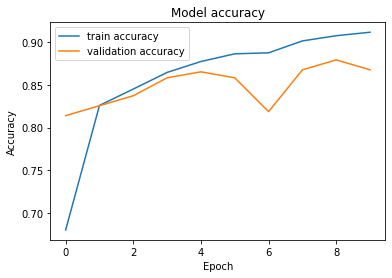

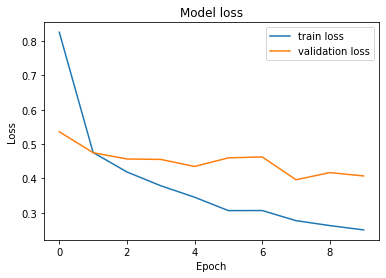

In [17]:
def plot_accuracy(history):
    
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(r)
plot_loss(r)

In [18]:
print("Total layers in the model : ",len(model.layers),"\n")

layers = [layer.output for layer in model.layers[0:]]
layer_names = []
for layer in model.layers[0:]: 
    layer_names.append(layer.name)
    
print("First layer : ", layer_names[0])
print("InceptionV3 layers : Layer 2 to Layer 311")
print("Our fine tuned layers : ", layer_names[311:314])
print("Final Layer : ", layer_names[314])

Total layers in the model :  315 

First layer :  input_1
InceptionV3 layers : Layer 2 to Layer 311
Our fine tuned layers :  ['global_average_pooling2d', 'dense', 'dropout']
Final Layer :  dense_1


In [19]:
K.clear_session()
path_to_model='./Flowers_model.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [20]:
category={
    0:'daisy', 
    1:'dandelion', 
    2:'rose', 
    3:'sunflower', 
    4:'tulip'
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

1/1 [==============================] - 0s 35ms/step


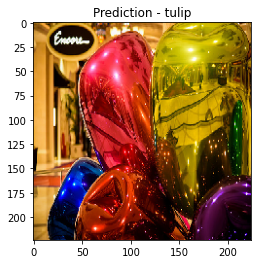

In [23]:
predict_image(os.path.join(testing_dir,'tulip/15632065904_0d9caf174b.jpg'),model)